# Лабораторна робота №2
## студентки групи МІТ-31
## Шмат Катерини Сергіївни

## Файл "Lab2generate.ipynb" тоже посмотрите пожалуйста. В одном файле 2 задания соединить не могла. Работают по отдельности
## Спасибо!

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('tips.csv')

In [24]:
df.replace({'Male': 0, 'Female':1, 'No': 0, 'Yes':1, 'Dinner':0, 'Lunch':1, 'Mon':0, 'Tue':1, 'Wed':2, 'Thur':3, 'Fri':4, 'Sat':5, 'Sun':6}, None, True)

In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,6,0,2
1,10.34,1.66,0,0,6,0,3
2,21.01,3.50,0,0,6,0,3
3,23.68,3.31,0,0,6,0,2
4,24.59,3.61,1,0,6,0,4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


In [27]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.356557,0.381148,4.725410,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,3.000000,0.000000,2.000000
50%,17.795000,2.900000,0.000000,0.000000,5.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,6.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,6.000000,1.000000,6.000000


In [28]:
corr = df.corr()

<AxesSubplot:>

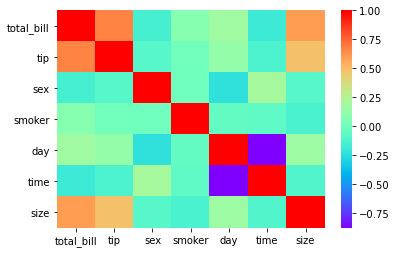

In [29]:
sns.heatmap(corr, cmap="rainbow")

In [30]:
import sklearn
from sklearn.model_selection import train_test_split

In [31]:
columns=df.columns
columns=columns[:2]
X=df[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time']]

y=df[['size']]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [33]:
 from sklearn.linear_model import LinearRegression

In [34]:
 lr = LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
y_Hat = lr.predict(X_test)

In [37]:
 from sklearn.metrics import mean_absolute_error

In [38]:
mean_absolute_error(y_test, y_Hat)

0.5594891757801953

In [39]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_Hat)

0.6268711539797576

In [40]:
res = pd.DataFrame(y_test)
res['size_predicted'] = y_Hat

res.head()

,size,size_predicted
136,2,1.981317
74,2,2.290819
183,4,2.926881
139,2,2.191860
138,2,1.970114


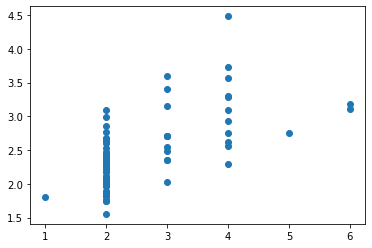

In [41]:
plt.scatter(res['size'],res['size_predicted'])